Katie's Question: 
Is there a relationship between the social media platform used and the levels of user anxiety and depression?


The Data Section:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install pandas matplotlib seaborn
import textwrap
from tabulate import tabulate


[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: pip install --upgrade pip


In [2]:
# Load the dataset with the full path
df = pd.read_csv('/Users/katiekavanagh/Desktop/smmh.csv')

from IPython.display import display

# Display the first few rows of the dataset using IPython.display
display(df.head())

,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,...,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1


In [3]:
# Display column names

# Column names
column_names = ['Age ', 'Gender', 'RelationshipStatus', 'Occupation ', 'Organization',
                'SocialMedia', 'SocialMediaPlatforms', 'NumberofSocialMediaPlatforms',
                'HoursSpent', 'Frequency', 'Distraction', 'Restlessness', 'Anxiety',
                'ConcentrationDifficulty', 'SelfComparision', 'PostSentiment',
                'ValidationSeeking', 'Depression', 'ActivityInterest Variance',
                'Sleeplessness']

# Create a DataFrame with the column names
columns_df = pd.DataFrame(column_names, columns=['Column Names'])

# Display the column names in a table format
print(tabulate(columns_df, headers='keys', tablefmt='pretty'))


+----+------------------------------+
|    |         Column Names         |
+----+------------------------------+
| 0  |             Age              |
| 1  |            Gender            |
| 2  |      RelationshipStatus      |
| 3  |          Occupation          |
| 4  |         Organization         |
| 5  |         SocialMedia          |
| 6  |     SocialMediaPlatforms     |
| 7  | NumberofSocialMediaPlatforms |
| 8  |          HoursSpent          |
| 9  |          Frequency           |
| 10 |         Distraction          |
| 11 |         Restlessness         |
| 12 |           Anxiety            |
| 13 |   ConcentrationDifficulty    |
| 14 |       SelfComparision        |
| 15 |        PostSentiment         |
| 16 |      ValidationSeeking       |
| 17 |          Depression          |
| 18 |  ActivityInterest Variance   |
| 19 |        Sleeplessness         |
+----+------------------------------+


In [32]:
df = df.rename(columns={
    '1. What is your age?': 'age',
    '2. Gender': 'gender',
    '3. Relationship Status': 'relationship_status',
    '4. Occupation Status': 'occupation_status',
    '5. What type of organizations are you affiliated with?': 'organization',
    '6. Do you use social media?': 'is_social_media_user',
    '7. What social media platforms do you commonly use?': 'social_media_platforms',
    '8. What is the average time you spend on social media every day?': 'avg_time_on_social_media',
    '9. How often do you find yourself using Social media without a specific purpose?': 'freq_on_social_media',
    '11. Do you feel restless if you haven\'t used Social media in a while?': 'restless_if_not_used',
    '12. On a scale of 1 to 5, how easily distracted are you?': 'distracted',
    '13. On a scale of 1 to 5, how much are you bothered by worries?': 'worried',
    '14. Do you find it difficult to concentrate on things?': 'difficulty_concentrating',
    '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?': 'compare_to_others',
    '16. Following the previous question, how do you feel about these comparisons, generally speaking?': 'feel_about_comparisons',
    '17. How often do you look to seek validation from features of social media?': 'seek_validation',
    '18. How often do you feel depressed or down?': 'depressed',
    '19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?': 'fluctuating_interest',
    '20. On a scale of 1 to 5, how often do you face issues regarding sleep?': 'sleep_issues'
})

# Verify the column names have been changed
print(df.columns)

# Verify the column names have been changed
column_names = df.columns.tolist()
columns_df = pd.DataFrame(column_names, columns=['Column Names'])

# Display the column names in a table format
print(tabulate(columns_df, headers='keys', tablefmt='pretty'))

Index(['Timestamp', 'age', 'gender', 'relationship_status',
       'occupation_status', 'organization', 'is_social_media_user',
       'social_media_platforms', 'avg_time_on_social_media',
       'freq_on_social_media',
       '10. How often do you get distracted by Social media when you are busy doing something?',
       'restless_if_not_used', 'distracted', 'worried',
       'difficulty_concentrating', 'compare_to_others',
       'feel_about_comparisons', 'seek_validation', 'depressed',
       'fluctuating_interest', 'sleep_issues'],
      dtype='object')
+----+----------------------------------------------------------------------------------------+
|    |                                      Column Names                                      |
+----+----------------------------------------------------------------------------------------+
| 0  |                                       Timestamp                                        |
| 1  |                                          age 

In [5]:
# Display basic information about the dataset
print(df.info())

# Display summary statistics
summary_statistics = df.describe(include='all')
print("\nSummary Statistics:")
print(tabulate(summary_statistics, headers='keys', tablefmt='pretty'))

# Check for missing values
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 21 columns):
 #   Column                                                                                  Non-Null Count  Dtype  
---  ------                                                                                  --------------  -----  
 0   Timestamp                                                                               481 non-null    object 
 1   age                                                                                     481 non-null    float64
 2   gender                                                                                  481 non-null    object 
 3   relationship_status                                                                     481 non-null    object 
 4   occupation_status                                                                       481 non-null    object 
 5   organization                                                           

In [6]:
# Drop rows with missing values
df.dropna(inplace=True)

/var/folders/vj/hvhj49qd53n9vtf8v185v5tr0000gn/T/ipykernel_32779/3711793106.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=10)


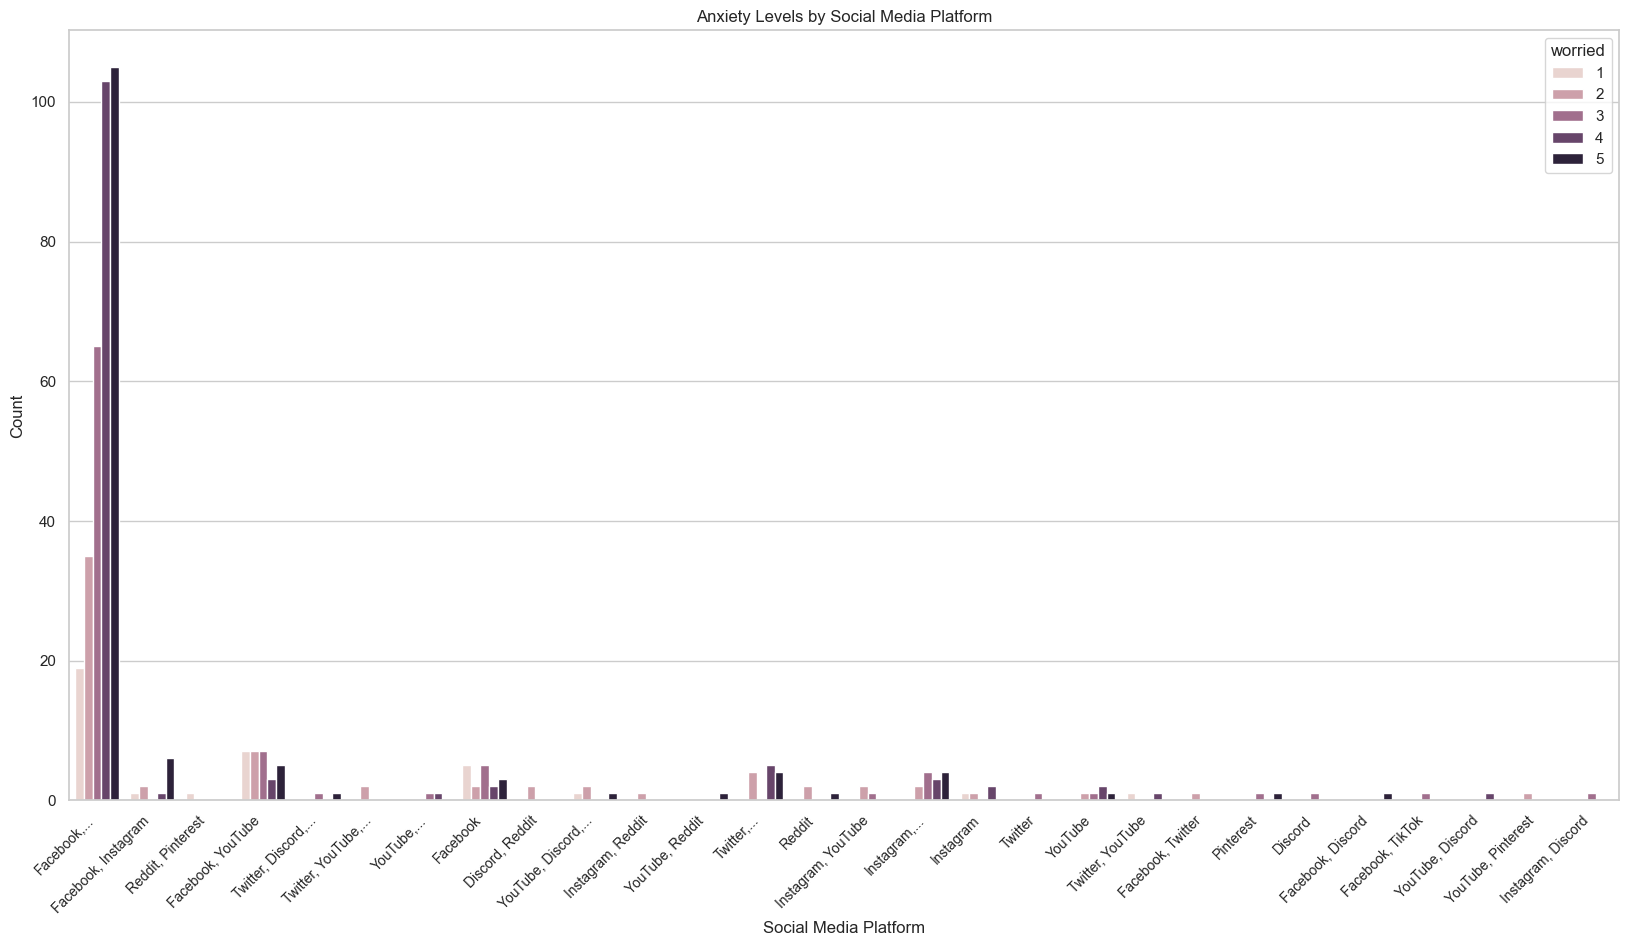

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import textwrap

# Ensure that platform names are abbreviated if necessary
df['social_media_platforms'] = df['social_media_platforms'].apply(lambda x: textwrap.shorten(x, width=20, placeholder="..."))

# Assuming the correct column name for anxiety levels is 'worried' (replace with actual name if different)
anxiety_column = 'worried'  # Replace with actual column name

# Bar plot for anxiety levels across different social media platforms
sns.set(style="whitegrid")
plt.figure(figsize=(20, 10))  # Increase figure size for better readability
ax = sns.countplot(data=df, x='social_media_platforms', hue=anxiety_column)
plt.title('Anxiety Levels by Social Media Platform')
plt.xlabel('Social Media Platform')
plt.ylabel('Count')

# Rotate x-axis labels and adjust their font size for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=10)

plt.show()


PLAYING AROUND

/var/folders/vj/hvhj49qd53n9vtf8v185v5tr0000gn/T/ipykernel_32779/3935203081.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=average_worried_levels, x='social_media_platforms', y='worried', palette="viridis")
/var/folders/vj/hvhj49qd53n9vtf8v185v5tr0000gn/T/ipykernel_32779/3935203081.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


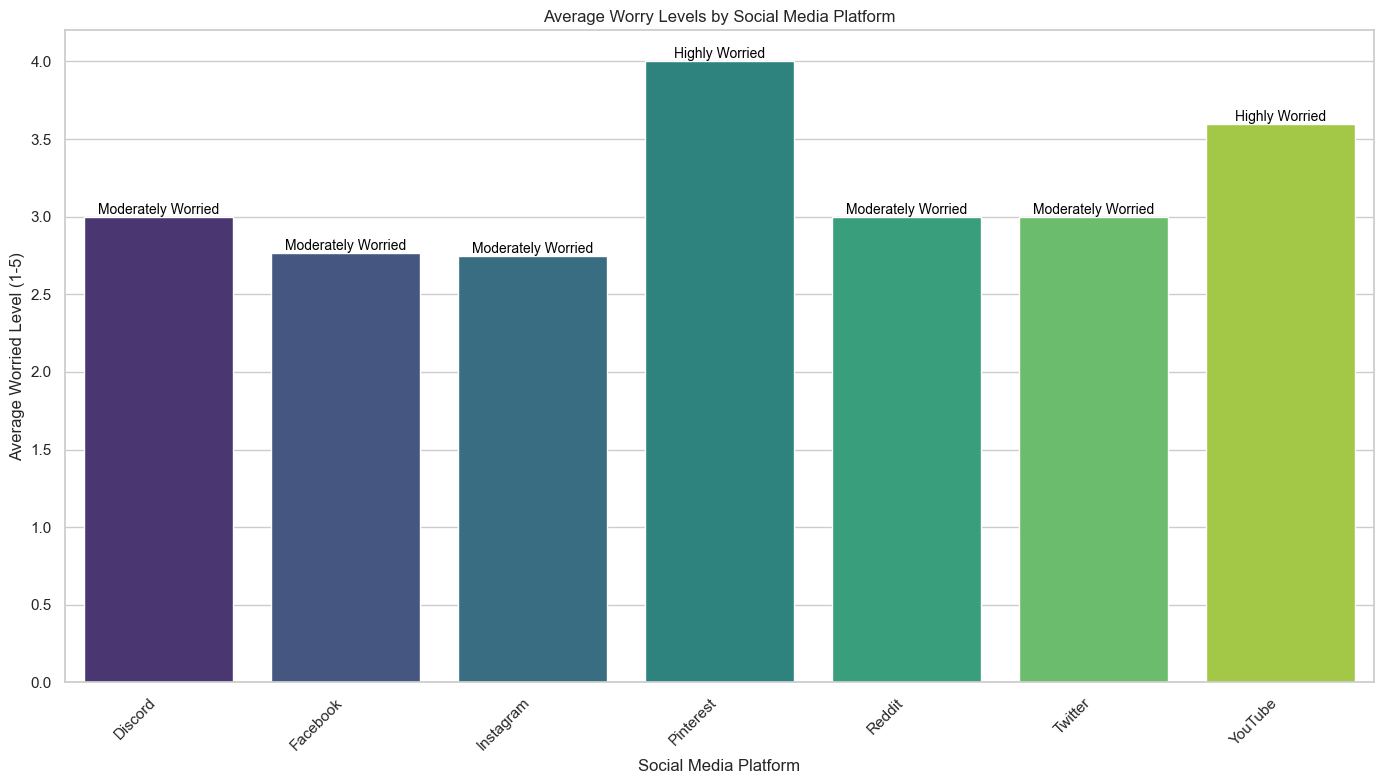

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is your DataFrame and 'social_media_platforms' and 'worried' are columns in the DataFrame

# Ensure 'worried' column is numeric for mean calculation
df['worried'] = pd.to_numeric(df['worried'], errors='coerce')

# Filter out rows with combined social media platforms
# Assume combined data has platforms separated by commas or spaces
df_individual_platforms = df[~df['social_media_platforms'].str.contains(',| ', regex=True)]

# Calculate the average worried levels for each individual platform
average_worried_levels = df_individual_platforms.groupby('social_media_platforms')['worried'].mean().reset_index()

# Ensure that 'worried' levels are between 1 and 5
average_worried_levels['worried'] = average_worried_levels['worried'].clip(1, 5)

# Map the numerical values to descriptive labels
worried_labels = {1: 'Not Worried', 2: 'Slightly Worried', 3: 'Moderately Worried', 4: 'Highly Worried', 5: 'Severely Worried'}
average_worried_levels['worried_label'] = average_worried_levels['worried'].round().astype(int).map(worried_labels)

# Set style for seaborn
sns.set(style="whitegrid")

# Create a bar plot to compare average worried levels
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=average_worried_levels, x='social_media_platforms', y='worried', palette="viridis")

# Add descriptive labels to the bars
for i in range(len(average_worried_levels)):
    ax.text(i, average_worried_levels['worried'][i], average_worried_levels['worried_label'][i], 
            ha='center', va='bottom', fontsize=10, color='black')

plt.title('Average Worry Levels by Social Media Platform')
plt.xlabel('Social Media Platform')
plt.ylabel('Average Worried Level (1-5)')

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.show()


/var/folders/vj/hvhj49qd53n9vtf8v185v5tr0000gn/T/ipykernel_32779/1837264236.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=combined_worried_levels, x='social_media_platforms', y='worried', palette="viridis")
/var/folders/vj/hvhj49qd53n9vtf8v185v5tr0000gn/T/ipykernel_32779/1837264236.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


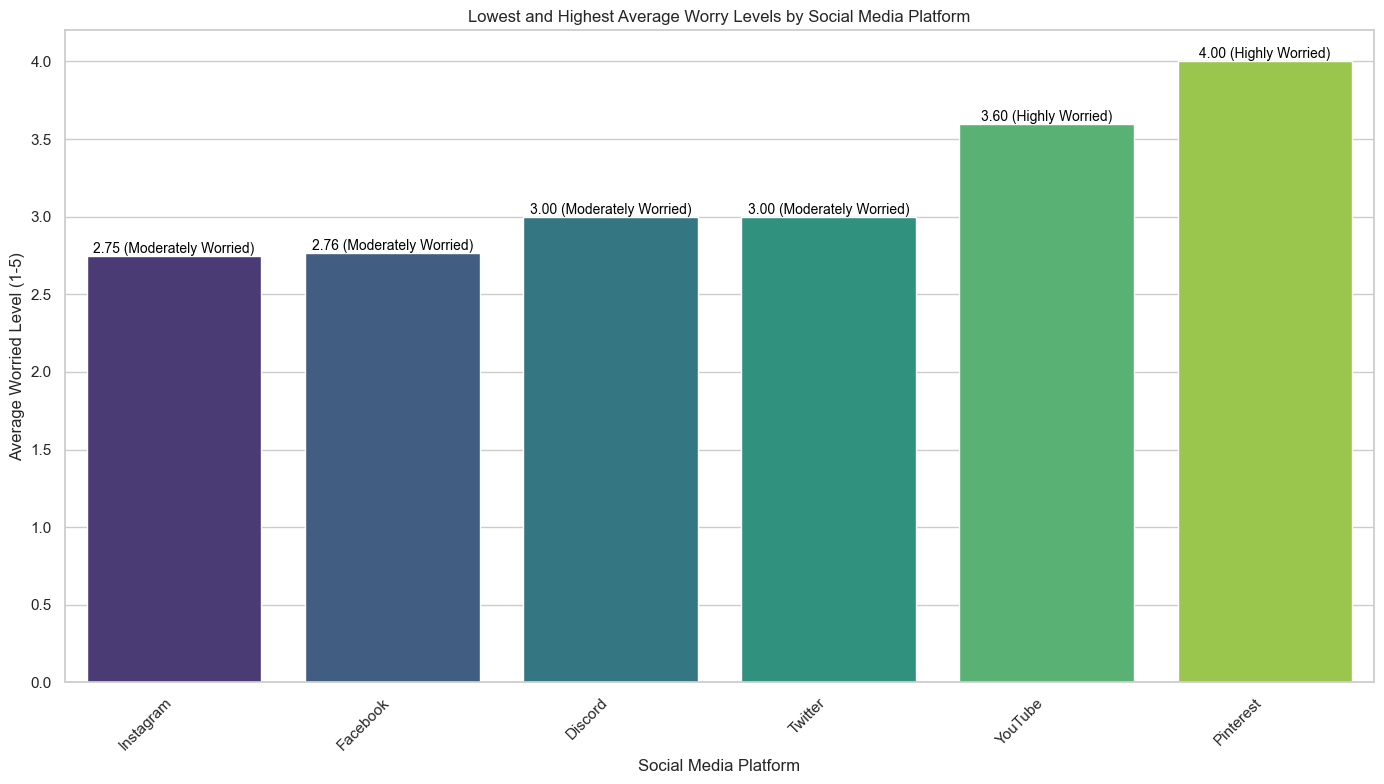

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure 'worried' column is numeric for mean calculation
df['worried'] = pd.to_numeric(df['worried'], errors='coerce')

# Filter out rows with combined social media platforms
df_individual_platforms = df[~df['social_media_platforms'].str.contains(',| ', regex=True)]

# Calculate the average worried levels for each individual platform
average_worried_levels = df_individual_platforms.groupby('social_media_platforms')['worried'].mean().reset_index()

# Ensure that 'worried' levels are between 1 and 5
average_worried_levels['worried'] = average_worried_levels['worried'].clip(1, 5)

# Sort the average worried levels
sorted_worried_levels = average_worried_levels.sort_values(by='worried')

# Get the three lowest and three highest worried levels
lowest_three = sorted_worried_levels.head(3)
highest_three = sorted_worried_levels.tail(3)

# Combine the lowest and highest three for plotting and reset index
combined_worried_levels = pd.concat([lowest_three, highest_three]).reset_index(drop=True)

# Map the numerical values to descriptive labels
worried_labels = {1: 'Not Worried', 2: 'Slightly Worried', 3: 'Moderately Worried', 4: 'Highly Worried', 5: 'Severely Worried'}
combined_worried_levels['worried_label'] = combined_worried_levels['worried'].round().astype(int).map(worried_labels)

# Set style for seaborn
sns.set(style="whitegrid")

# Create a bar plot to compare the lowest and highest worried levels
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=combined_worried_levels, x='social_media_platforms', y='worried', palette="viridis")

# Add descriptive labels to the bars
for i in range(len(combined_worried_levels)):
    label = f"{combined_worried_levels['worried'][i]:.2f} ({combined_worried_levels['worried_label'][i]})"
    ax.text(i, combined_worried_levels['worried'][i], label, 
            ha='center', va='bottom', fontsize=10, color='black')

plt.title('Lowest and Highest Average Worry Levels by Social Media Platform')
plt.xlabel('Social Media Platform')
plt.ylabel('Average Worried Level (1-5)')

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.show()


(2.75, 2.82)

In [21]:
# Extract the relevant columns with the correct column names
df_filtered = df[['social_media_platforms', 'worried']]

# Function to calculate average worry level for each platform
def calculate_average_worry(platform):
    # Filter rows containing the specified platform
    platform_data = df_filtered[df_filtered['social_media_platforms'].str.contains(platform, na=False)]
    # Calculate and return the average worry level
    return platform_data['worried'].mean()

# Calculate average worry levels for Pinterest and YouTube
pinterest_worry_avg = calculate_average_worry('Pinterest')
youtube_worry_avg = calculate_average_worry('YouTube')

pinterest_worry_avg, youtube_worry_avg


(2.75, 2.82)

In [22]:
# Extract the relevant columns with the correct column names
df_filtered = df[['social_media_platforms', 'worried']]

# Function to calculate average worry level for each platform
def calculate_average_worry(platform):
    # Filter rows containing the specified platform
    platform_data = df_filtered[df_filtered['social_media_platforms'].str.contains(platform, na=False)]
    # Calculate and return the average worry level
    return platform_data['worried'].mean()

# Calculate average worry levels for Pinterest and YouTube
pinterest_worry_avg = calculate_average_worry('Pinterest')
youtube_worry_avg = calculate_average_worry('YouTube')

pinterest_worry_avg, youtube_worry_avg


(2.75, 2.82)

Highest Worry Levels Compared Across Social Media Platforms

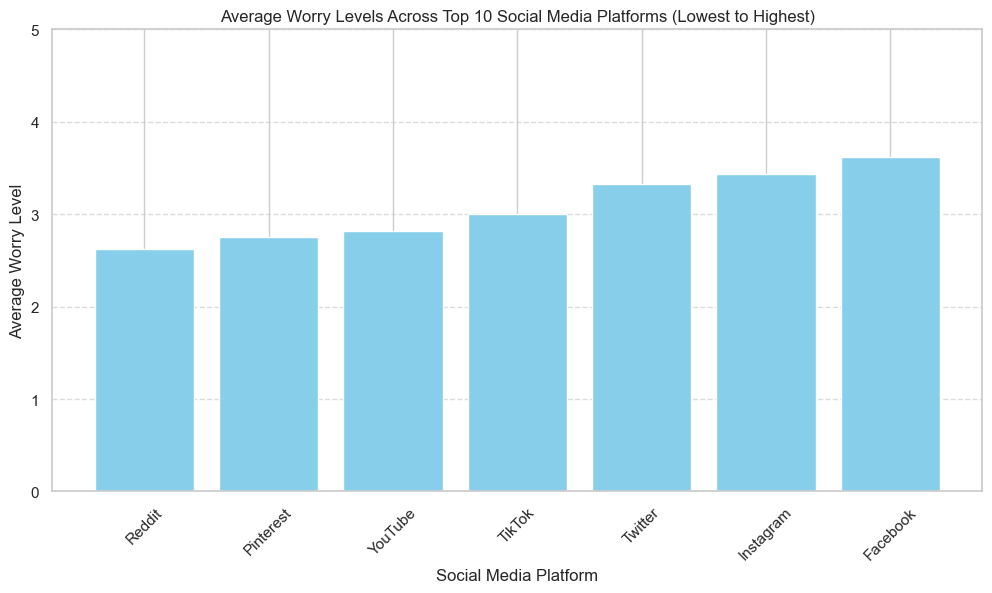

In [26]:
# List of top 10 social media platforms to compare
top_platforms = ['Facebook', 'Instagram', 'Twitter', 'YouTube', 'Pinterest', 'Snapchat', 'TikTok', 'Reddit', 'LinkedIn', 'WhatsApp']

# Calculate average worry levels for each platform in the top 10 list
worry_levels = {platform: calculate_average_worry(platform) for platform in top_platforms}

# Create a DataFrame for better visualization
worry_levels_df = pd.DataFrame(list(worry_levels.items()), columns=['Social Media Platform', 'Average Worry Level'])

# Sort the DataFrame by Average Worry Level
worry_levels_df = worry_levels_df.sort_values(by='Average Worry Level', ascending=False).reset_index(drop=True)

# Round off the average worry levels to the nearest hundredth
worry_levels_df['Average Worry Level'] = worry_levels_df['Average Worry Level'].round(2)

# Display the updated DataFrame
worry_levels_df

# Sort the DataFrame by Average Worry Level in ascending order
worry_levels_df = worry_levels_df.sort_values(by='Average Worry Level', ascending=True).reset_index(drop=True)

# Plot a bar chart for comparison of average worry levels from lowest to highest
plt.figure(figsize=(12, 6))
plt.bar(worry_levels_df['Social Media Platform'], worry_levels_df['Average Worry Level'], color='skyblue')
plt.xlabel('Social Media Platform')
plt.ylabel('Average Worry Level')
plt.title('Average Worry Levels Across Top 10 Social Media Platforms (Lowest to Highest)')
plt.xticks(rotation=45)
plt.ylim(0, 5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



Highest Worry Level of 2 Combined Social Media Platforms

In [39]:
from itertools import combinations

# Corrected column names
social_media_col = 'social_media_platforms'
worry_col = 'worried'

# Calculate worry levels for all pairs of social media platforms
pair_worry_levels = {}
for platform1, platform2 in combinations(top_platforms, 2):
    pair_data = df[
        df[social_media_col].str.contains(platform1, na=False) &
        df[social_media_col].str.contains(platform2, na=False)
    ]
    avg_worry_level = pair_data[worry_col].mean()
    pair_worry_levels[(platform1, platform2)] = avg_worry_level

# Sort the pairs by their average worry level in descending order and get the top 5
top_5_pairs = sorted(pair_worry_levels.items(), key=lambda x: x[1], reverse=True)[:5]

# Convert to a DataFrame for better visualization
top_5_pairs_df = pd.DataFrame(top_5_pairs, columns=['Social Media Platforms', 'Average Worry Level'])

# Display the DataFrame
top_5_pairs_df


,Social Media Platforms,Average Worry Level
0,"(Facebook, Instagram)",3.900000
1,"(Facebook, YouTube)",2.724138
2,"(Facebook, Twitter)",2.000000
3,"(Facebook, Pinterest)",NaN
4,"(Facebook, Snapchat)",NaN


END

/var/folders/vj/hvhj49qd53n9vtf8v185v5tr0000gn/T/ipykernel_28045/3868003159.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=45, horizontalalignment='right', fontsize=10)


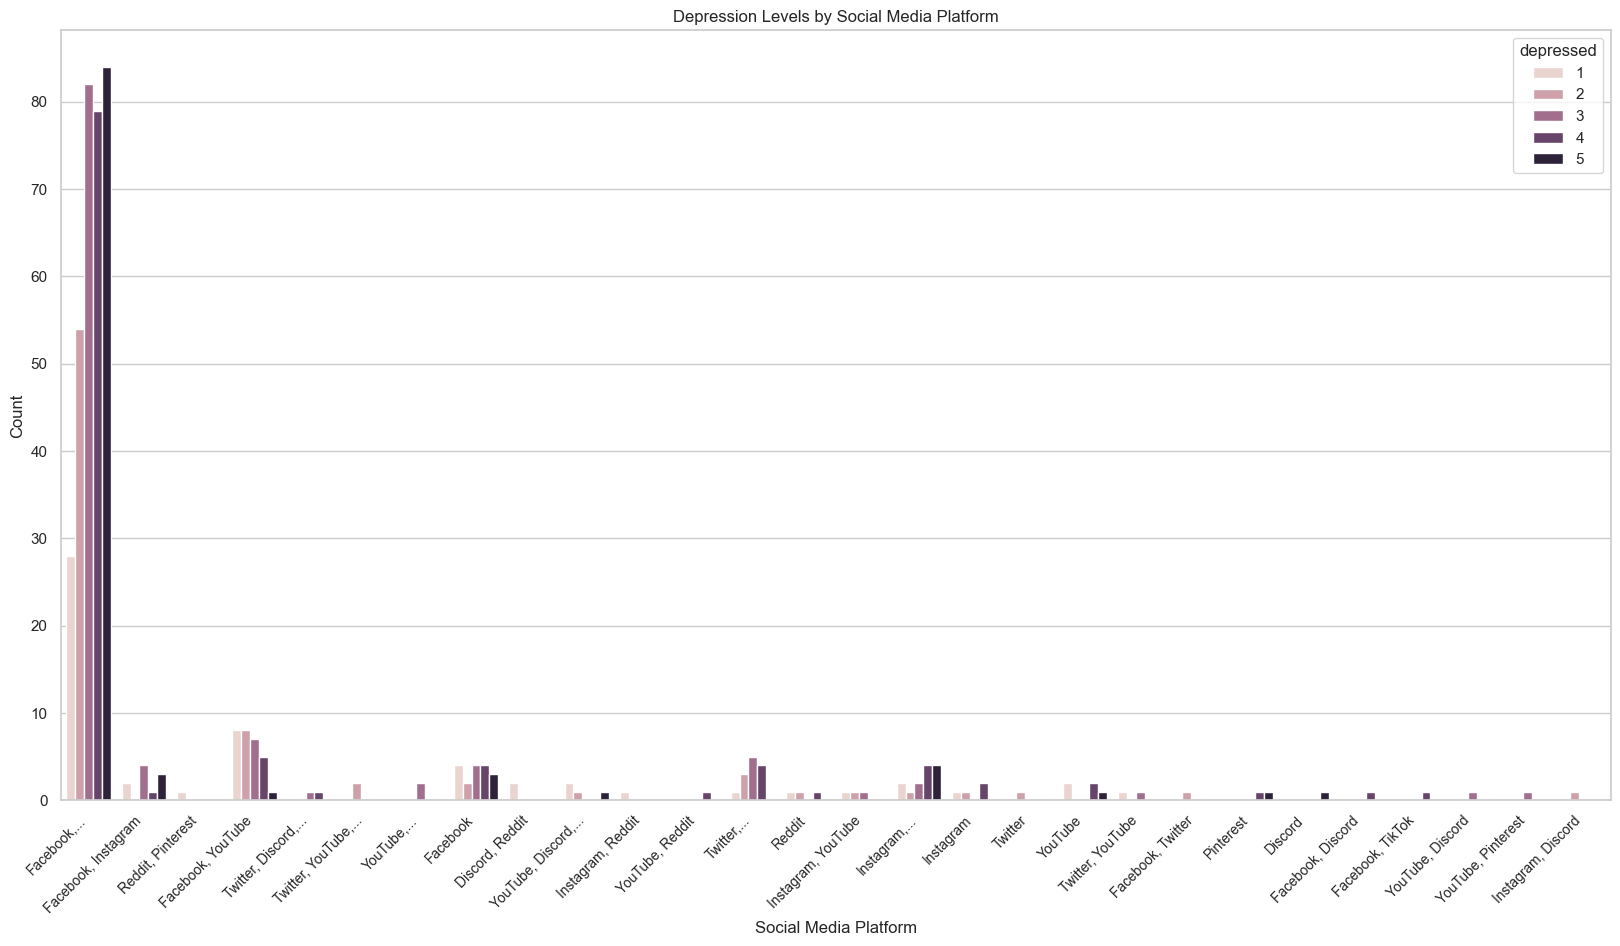

In [65]:
# Ensure that platform names are abbreviated if necessary
df['social_media_platforms'] = df['social_media_platforms'].apply(lambda x: textwrap.shorten(x, width=20, placeholder="..."))

# Function to wrap text labels if necessary
def wrap_labels(ax, width):
    labels = [textwrap.fill(label.get_text(), width) for label in ax.get_xticklabels()]
    ax.set_xticklabels(labels, rotation=45, horizontalalignment='right', fontsize=10)

# Bar plot for depression levels across different social media platforms
sns.set(style="whitegrid")
plt.figure(figsize=(20, 10))  # Increase figure size for better readability
ax = sns.countplot(data=df, x='social_media_platforms', hue='depressed')
plt.title('Depression Levels by Social Media Platform')
plt.xlabel('Social Media Platform')
plt.ylabel('Count')

# Rotate x-axis labels and adjust their font size for better readability
wrap_labels(ax, 20)

plt.show()

The Analysis Section:

In [27]:
from scipy.stats import chi2_contingency

# Create a contingency table for anxiety and social media platforms
contingency_anxiety = pd.crosstab(df['SocialMediaPlatforms'], df['Anxiety'])

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_anxiety)
print(f'Chi-Square Test for Anxiety and Social Media Platform:\nChi2: {chi2}, p-value: {p}\n')

Chi-Square Test for Anxiety and Social Media Platform:
Chi2: 175.00564693897374, p-value: 0.00013071220775558048



In [28]:
# Create a contingency table for depression and social media platforms
contingency_depression = pd.crosstab(df['SocialMediaPlatforms'], df['Depression'])

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_depression)
print(f'Chi-Square Test for Depression and Social Media Platform:\nChi2: {chi2}, p-value: {p}\n')

Chi-Square Test for Depression and Social Media Platform:
Chi2: 157.58248637849897, p-value: 0.002957359129512755



/var/folders/vj/hvhj49qd53n9vtf8v185v5tr0000gn/T/ipykernel_27933/3012794594.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=10)


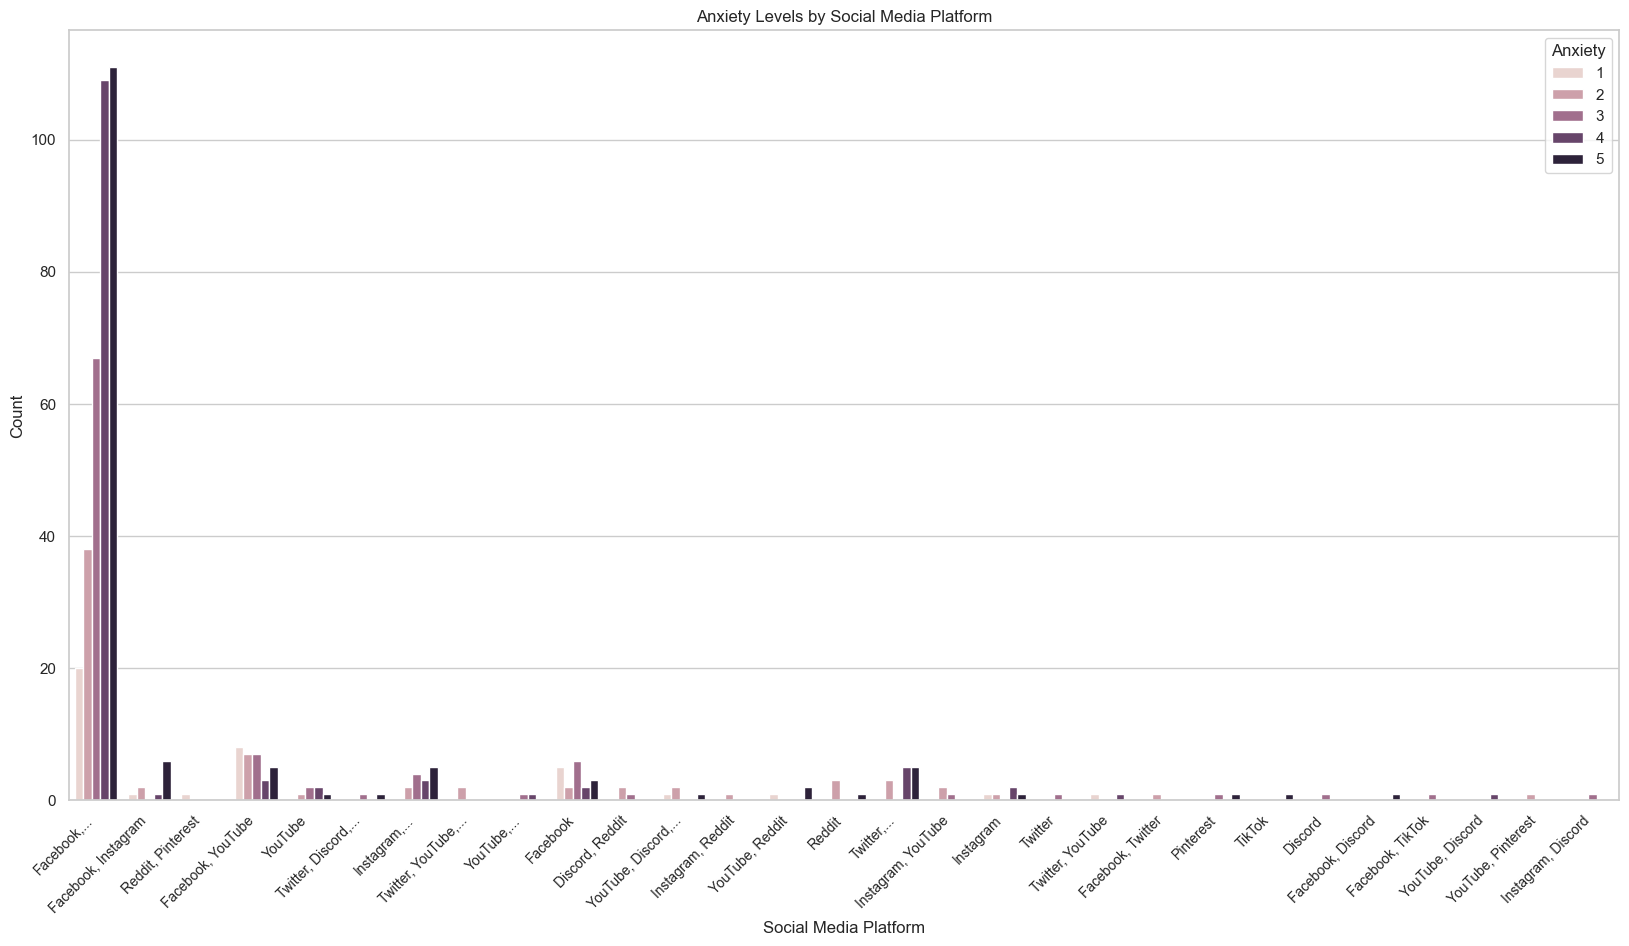

/var/folders/vj/hvhj49qd53n9vtf8v185v5tr0000gn/T/ipykernel_27933/3012794594.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=10)


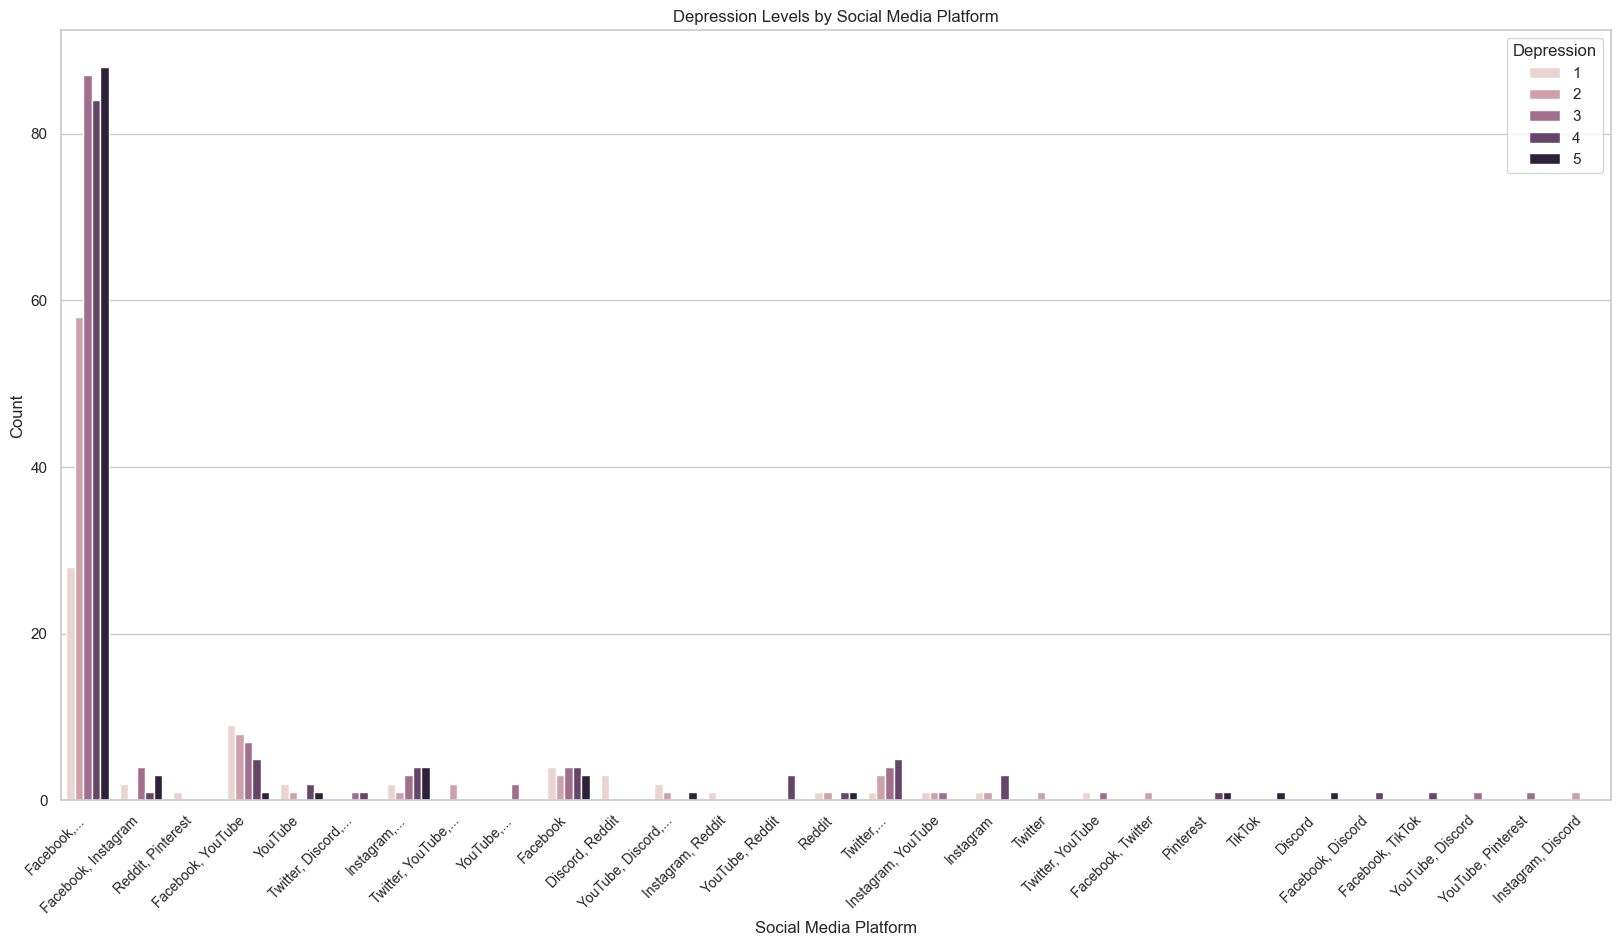

Chi-Square Test for Anxiety:
Chi2: 175.00564693897374, p-value: 0.00013071220775558048

Chi-Square Test for Depression:
Chi2: 157.58248637849897, p-value: 0.002957359129512755

There is a significant relationship between social media platforms and anxiety levels.
There is a significant relationship between social media platforms and depression levels.


In [29]:
#chi testing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import textwrap

# Load the dataset
df = pd.read_csv('/Users/katiekavanagh/Desktop/smmh.csv')

# Ensure that platform names are abbreviated if necessary
df['SocialMediaPlatforms'] = df['SocialMediaPlatforms'].apply(lambda x: textwrap.shorten(x, width=20, placeholder="..."))

# Bar plot for anxiety levels across different social media platforms
sns.set(style="whitegrid")
plt.figure(figsize=(20, 10))  # Increase figure size for better readability
ax = sns.countplot(data=df, x='SocialMediaPlatforms', hue='Anxiety')
plt.title('Anxiety Levels by Social Media Platform')
plt.xlabel('Social Media Platform')
plt.ylabel('Count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=10)
plt.show()

# Bar plot for depression levels across different social media platforms
sns.set(style="whitegrid")
plt.figure(figsize=(20, 10))  # Increase figure size for better readability
ax = sns.countplot(data=df, x='SocialMediaPlatforms', hue='Depression')
plt.title('Depression Levels by Social Media Platform')
plt.xlabel('Social Media Platform')
plt.ylabel('Count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=10)
plt.show()

# Chi-Square Test for Anxiety Levels
contingency_anxiety = pd.crosstab(df['SocialMediaPlatforms'], df['Anxiety'])
chi2_anxiety, p_anxiety, dof_anxiety, expected_anxiety = chi2_contingency(contingency_anxiety)
print(f'Chi-Square Test for Anxiety:\nChi2: {chi2_anxiety}, p-value: {p_anxiety}\n')

# Chi-Square Test for Depression Levels
contingency_depression = pd.crosstab(df['SocialMediaPlatforms'], df['Depression'])
chi2_depression, p_depression, dof_depression, expected_depression = chi2_contingency(contingency_depression)
print(f'Chi-Square Test for Depression:\nChi2: {chi2_depression}, p-value: {p_depression}\n')

# Interpretation of Anxiety Results
if p_anxiety < 0.05:
    print("There is a significant relationship between social media platforms and anxiety levels.")
else:
    print("There is no significant relationship between social media platforms and anxiety levels.")

# Interpretation of Depression Results
if p_depression < 0.05:
    print("There is a significant relationship between social media platforms and depression levels.")
else:
    print("There is no significant relationship between social media platforms and depression levels.")

In [30]:
# Interpretation of Anxiety Results
if p_anxiety < 0.05:
    print("There is a significant relationship between social media platforms and anxiety levels.")
else:
    print("There is no significant relationship between social media platforms and anxiety levels.")

# Interpretation of Depression Results
if p_depression < 0.05:
    print("There is a significant relationship between social media platforms and depression levels.")
else:
    print("There is no significant relationship between social media platforms and depression levels.")


There is a significant relationship between social media platforms and anxiety levels.
There is a significant relationship between social media platforms and depression levels.


In [31]:
recommendations = """
Recommendations:

1. **Monitor and Manage Social Media Usage:**
   - Schools and parents should actively monitor the time students spend on various social media platforms.
   - Encourage balanced usage and set healthy limits on the time spent on social media.

2. **Promote Mental Health Awareness:**
   - Conduct workshops and awareness programs on the impact of social media on mental health.
   - Provide resources and support for students experiencing anxiety and depression.

3. **Develop Interventions:**
   - Implement school-based interventions such as counseling and mental health support services.
   - Encourage students to participate in offline activities and hobbies to reduce reliance on social media for validation.

4. **Further Research:**
   - Conduct longitudinal studies to understand the long-term effects of social media usage on mental health.
   - Explore the impact of specific features of social media platforms on mental well-being.

By following these recommendations, we can better manage the impact of social media on mental health and support the well-being of students.
"""
print(recommendations)



Recommendations:

1. **Monitor and Manage Social Media Usage:**
   - Schools and parents should actively monitor the time students spend on various social media platforms.
   - Encourage balanced usage and set healthy limits on the time spent on social media.

2. **Promote Mental Health Awareness:**
   - Conduct workshops and awareness programs on the impact of social media on mental health.
   - Provide resources and support for students experiencing anxiety and depression.

3. **Develop Interventions:**
   - Implement school-based interventions such as counseling and mental health support services.
   - Encourage students to participate in offline activities and hobbies to reduce reliance on social media for validation.

4. **Further Research:**
   - Conduct longitudinal studies to understand the long-term effects of social media usage on mental health.
   - Explore the impact of specific features of social media platforms on mental well-being.

By following these recommendations, w